# Notebook 6 - Forecasts

In this simple notebook just select the store and product, run all cell and it will output the predictions

In [1]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Select the store and product to get predictions
store = '404'
product = '2846'

Prediction for product 2846 in store 404


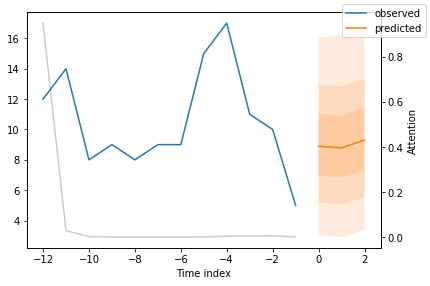

In [3]:
tft = '../Databases/QT_tft.sav'
tft = pickle.load(open(tft, 'rb'))
new_prediction_data = '../Databases/new_prediction_data.sav'
new_prediction_data = pickle.load(open(new_prediction_data, 'rb'))


if store in new_prediction_data['Point-of-Sale_ID'].unique():
    if product in new_prediction_data[new_prediction_data['Point-of-Sale_ID']=='404']['ProductName_ID'].unique():
        print(f'Prediction for product {product} in store {store}')
        

        raw_prediction,new_x = tft.predict(
            new_prediction_data[(new_prediction_data['Point-of-Sale_ID']==store)&(new_prediction_data['ProductName_ID']==product)],
            mode="raw",
            return_x=True,
        )
        tft.plot_prediction(new_x, raw_prediction, idx=0, show_future_observed=False);
    else:
        print('This product is not available for predictions in this store.')
        print('Please choose one of the following products:')
        print(new_prediction_data[new_prediction_data['Point-of-Sale_ID']=='404']['ProductName_ID'].unique().to_list())
else:
    print('This store is not available for predictions.')
    print('Please choose one of the following stores:')
    print(new_prediction_data['Point-of-Sale_ID'].unique().to_list())